In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

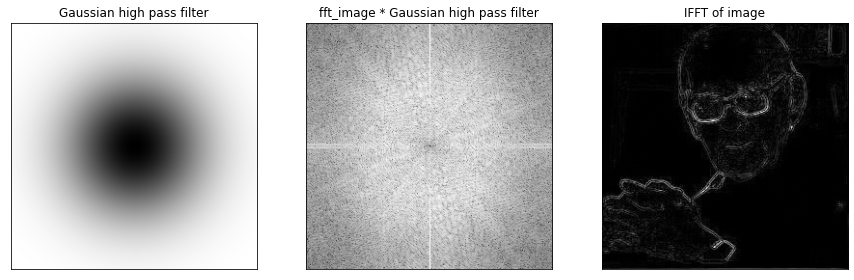

In [11]:
[x, y] = np.meshgrid(np.array(range(-128,128)), np.array(range(-128,128)))
s1 = 256
s2 = 256
R = 50.0
D = np.sqrt(x**2 + y**2)
H = 1-(np.exp((-1 / 2)*(D/R) ** 2))

img = np.array(cv2.imread("professor.jpg", cv2.IMREAD_GRAYSCALE), dtype=np.uint8)
af = np.fft.fftshift(np.fft.fft2(img))
t = af*H
t_d = np.abs(t)
t_d_log = np.log(1+t_d)
max_val = np.max(np.max(t_d_log))

cfli1 = np.fft.ifft2(np.fft.fftshift(t))
IFFTt = np.abs(cfli1)
IFFTt_log = np.log(1+IFFTt)
max_val_2 = np.max(np.max(IFFTt_log))

fig, axes = plt.subplots(1, 3 ,figsize=(15,5))
axes[0].imshow(H, cmap='gray', vmin=np.min(H), vmax=np.max(H))
axes[0].set_title('Gaussian high pass filter')

axes[1].imshow(t_d_log/max_val, cmap='gray', vmin=np.min(t_d_log/max_val), vmax=np.max(t_d_log/max_val))
axes[1].set_title('fft_image * Gaussian high pass filter')

axes[2].imshow(IFFTt, cmap='gray', vmin=np.min(IFFTt), vmax=np.max(IFFTt))
axes[2].set_title('IFFT of image')

for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()